In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [2]:
#Loading the ptbdb dats set
abnormal     = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/ptbdb_abnormal.csv", header = None)
normal       = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/ptbdb_normal.csv", header = None)

In [3]:
abnormal.shape

(10506, 188)

In [4]:
normal.shape

(4046, 188)

In [5]:
abnormal[187].unique()

array([1.])

In [6]:
normal[187].unique()

array([0.])

In [7]:
#Combining abnormal and normal
ptbdb_data = pd.merge(abnormal, normal, how='outer')
ptbdb_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14550,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
ptbdb_data_lbl0 = resample(ptbdb_data[ptbdb_data[187]==0], replace=True, n_samples=15000, random_state=113)
ptbdb_data_lbl1 = resample(ptbdb_data[ptbdb_data[187]==1], replace=True, n_samples=15000, random_state=113)

In [9]:
label_names = ['Normal Beats', 'Abnormal Beats']
train= pd.concat([ptbdb_data_lbl0, ptbdb_data_lbl1])
labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
0    15000
1    15000
Name: 187, dtype: int64


In [10]:
ptbdb_data.shape

(14552, 188)

In [11]:
#Feature Scaling
x = ptbdb_data.iloc[:, :-1].values
y = ptbdb_data.iloc[:, -1].values

In [12]:
x.shape

(14552, 187)

In [13]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0.5, 1.0, 'Normal Beats')

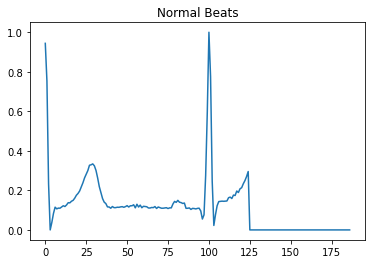

In [15]:
plt.plot(np.array(ptbdb_data_lbl0.sample(1))[0, :187])
plt.title(label_names[0])

Text(0.5, 1.0, 'Normal Beats')

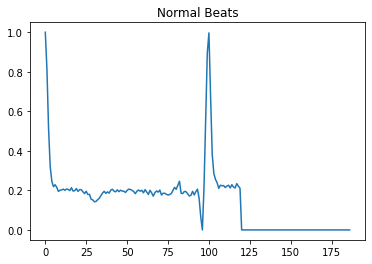

In [16]:
plt.plot(np.array(ptbdb_data_lbl1.sample(1))[0, :187])
plt.title(label_names[0])

In [17]:
def gaussian_noise(signal):
    noise = np.random.normal(0,0.05,187)
    return signal + noise

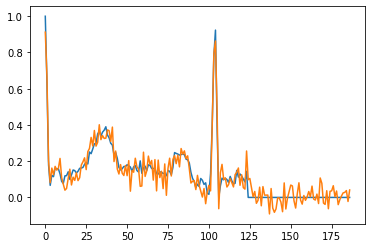

In [18]:
sample = ptbdb_data_lbl1.sample(1).values[0]

sample_with_noise = gaussian_noise(sample[:187])

plt.subplot(1, 1, 1)

plt.plot(sample[:187])
plt.plot(sample_with_noise)

In [19]:

ytrain = tensorflow.keras.utils.to_categorical(y_train[187])
ytest = tensorflow.keras.utils.to_categorical(y_test[187])

# Input to the model
xtrain = x_train
xtest = x_test

# Adding noise
for i in range(xtrain.shape[0]):
    xtrain[i, :187] = gaussian_noise(xtrain[i, :187])

In [20]:
xtrain.shape

(10914, 187)

In [21]:
xtrain

array([[ 0.71799276,  0.21044151, -0.88418106, ...,  0.03515942,
         0.00523458, -0.00296839],
       [ 0.71656365, -1.13734368, -1.02595927, ..., -0.02080217,
         0.03376457, -0.01245706],
       [-0.92233744,  1.30034874,  2.21531514, ..., -0.03019706,
        -0.04547098, -0.02605072],
       ...,
       [ 0.63057051, -0.69644501, -1.19809079, ...,  0.0127839 ,
         0.06854135, -0.00602132],
       [ 0.64418544, -2.05067439, -1.11577402, ...,  0.01188959,
        -0.11823012,  0.00719379],
       [ 0.70639914,  0.01931336, -0.42105602, ..., -0.03715792,
         0.01467578, -0.02318962]])

In [22]:
# np.expand_dims() : we can get the expanded dimensions of the array

In [23]:
xtrain = np.expand_dims(xtrain, 2)
xtest = np.expand_dims(xtest, 2)

print("Shape of training data: ")
print("Input: ", xtrain.shape)
print("Output: ", ytrain.shape)

print("\nShape of test data: ")
print("Input: ", xtest.shape)
print("Output: ", ytest.shape)

Shape of training data: 
Input:  (10914, 187, 1)
Output:  (2,)

Shape of test data: 
Input:  (3638, 187, 1)
Output:  (2,)


In [29]:
model = Sequential()
model.add(Conv1D(64, 6, activation = 'relu', input_shape = xtrain[0].shape))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

model.compile(optimizer = tensorflow.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 182, 64)           448       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 90, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 85, 64)            24640     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 37, 64)            24640     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 18, 64)          

In [30]:
history = model.fit(x_train, y_train, epochs = 8, batch_size = 32)


Epoch 1/8
342/342 [==============================] - 12s 33ms/step - loss: 0.0000e+00 - accuracy: 0.7233
Epoch 2/8
342/342 [==============================] - 11s 32ms/step - loss: 0.0000e+00 - accuracy: 0.7233
Epoch 3/8
342/342 [==============================] - 11s 32ms/step - loss: 0.0000e+00 - accuracy: 0.7233
Epoch 4/8
342/342 [==============================] - 11s 31ms/step - loss: 0.0000e+00 - accuracy: 0.7233
Epoch 5/8
342/342 [==============================] - 11s 33ms/step - loss: 0.0000e+00 - accuracy: 0.7233
Epoch 6/8
342/342 [==============================] - 11s 33ms/step - loss: 0.0000e+00 - accuracy: 0.7233
Epoch 7/8
342/342 [==============================] - 11s 32ms/step - loss: 0.0000e+00 - accuracy: 0.7233
Epoch 8/8
342/342 [==============================] - 11s 32ms/step - loss: 0.0000e+00 - accuracy: 0.7233


In [39]:
def plot(history, variable, variable2):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable, variable2])
    plt.title(variable)